In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt
import os

In [33]:
#학습셋의 변형을 설정하는 부분입니다. 
train_datagen = ImageDataGenerator(rescale=1./255,          
                                   # 주어진 이미지의 크기를 설정합니다.
                                  horizontal_flip=True,     
                            # 수평 대칭 이미지를 50% 확률로 만들어 추가합니다.
                                  width_shift_range=0.1,    
                                   # 전체 크기의 15% 범위에서 좌우로 이동합니다.
                                  height_shift_range=0.1,   
                                   # 마찬가지로 위, 아래로 이동합니다.
                                  #rotation_range=5,        
                                   # 정해진 각도만큼 회전시킵니다.
                                  #shear_range=0.7,         
                               # 좌표 하나를 고정시키고 나머지를 이동시킵니다.
                                  #zoom_range=1.2,          
                                   # 확대 또는 축소시킵니다.
                                  #vertical_flip=True,     
                                   # 수직 대칭 이미지를 만듭니다.
                                  #fill_mode='nearest'      
                                   # 빈 공간을 채우는 방법입니다. 
                                #nearest 옵션은 가장 비슷한 색으로 채우게 됩니다.
                                  )  

train_generator = train_datagen.flow_from_directory('data/data2/train',
                                                  target_size=(150,150),
                                                  batch_size=5,
                                                  class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('data/data2/test',
                                                  target_size=(150,150),
                                                  batch_size=5,
                                                  class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [34]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(150, 150, 3),
                       activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [35]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.0002),
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [36]:
history = model.fit(
       train_generator,
       epochs=100,
       validation_data=test_generator,
       callbacks=[early_stopping])

Epoch 1/100
32/32 [==============================] - 5s 150ms/step - loss: 0.6978 - accuracy: 0.5500 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 4s 130ms/step - loss: 0.6915 - accuracy: 0.5063 - val_loss: 0.6872 - val_accuracy: 0.5500
Epoch 3/100
32/32 [==============================] - 4s 115ms/step - loss: 0.6946 - accuracy: 0.5063 - val_loss: 0.6823 - val_accuracy: 0.5083
Epoch 4/100
32/32 [==============================] - 3s 109ms/step - loss: 0.6683 - accuracy: 0.6687 - val_loss: 0.6822 - val_accuracy: 0.5167
Epoch 5/100
32/32 [==============================] - 3s 108ms/step - loss: 0.6824 - accuracy: 0.5500 - val_loss: 0.6525 - val_accuracy: 0.5750
Epoch 6/100
32/32 [==============================] - 3s 108ms/step - loss: 0.6567 - accuracy: 0.5750 - val_loss: 0.6196 - val_accuracy: 0.6833
Epoch 7/100
32/32 [==============================] - 3s 108ms/step - loss: 0.6549 - accuracy: 0.6313 - val_loss: 0.5787 - val_accuracy: 0.7833

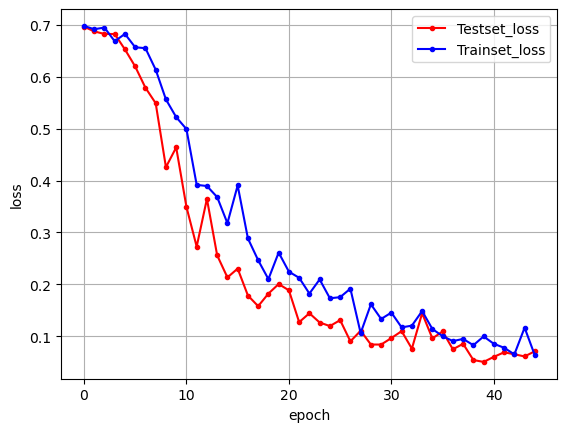

In [48]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()